In [83]:
# imports
from transformers import pipeline
import string
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brianliu03/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# get pre-trained model
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

In [197]:
# stop words for filtering
stopwords = set(nltk.corpus.stopwords.words('english'))

In [55]:
# load different texts
text = open('text_stimuli/01_1.txt').read()[58:]
text_sentences = nltk.sent_tokenize(text.replace('\n', ' '))
text_words = nltk.word_tokenize(text)
text_stop_words = [w for w in text_words if w.lower() not in stopwords and w not in string.punctuation]
text_stop_sentences = [
    ' '.join([word for word in s.split() if word.lower() not in stopwords])
    for s in text_sentences
]

In [179]:
# get predictions
predictions_sentences = classifier(text_sentences)
predictions_words = classifier(text_words)
predictions_stop_words = classifier(text_stop_words)
predictions_stop_sentences = classifier(text_stop_sentences)

In [194]:
# get dataframes
df_sentences = pd.DataFrame(predictions_sentences).stack().apply(pd.Series).reset_index(names=['sentence', 'emotion'])
# reshape dataframe
df_sentences = df_sentences.pivot_table(columns='label', index='sentence', values='score')

df_words = pd.DataFrame(predictions_words).stack().apply(pd.Series).reset_index(names=['word', 'emotion'])
df_words = df_words.pivot_table(columns='label', index='word', values='score')

df_stop_words = pd.DataFrame(predictions_stop_words).stack().apply(pd.Series).reset_index(names=['word', 'emotion'])
df_stop_words = df_stop_words.pivot_table(columns='label', index='word', values='score')

df_stop_sentences = pd.DataFrame(predictions_stop_sentences).stack().apply(pd.Series).reset_index(names=['sentence', 'emotion'])
df_stop_sentences = df_stop_sentences.pivot_table(columns='label', index='sentence', values='score')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 17))
fig.suptitle('Texts over Emotions')

# plot df_sentences
ax1.imshow(df_sentences, cmap='viridis')
ax1.set_title('Sentences over Emotions (raw text)')
ax1.set_yticks(np.arange(len(df_sentences.index)))
ax1.set_yticklabels(df_sentences.index)
ax1.set_xticks(np.arange(len(df_sentences.columns)))
ax1.set_xticklabels(df_sentences.columns, rotation=90)

# plot df_stop_sentences
ax2.imshow(df_stop_sentences, cmap='viridis')
ax2.set_title('Sentences over Emotions (stop words removed)')
ax2.set_yticks(np.arange(len(df_stop_sentences.index)))
ax2.set_yticklabels(df_stop_sentences.index)
ax2.set_xticks(np.arange(len(df_stop_sentences.columns)))
ax2.set_xticklabels(df_stop_sentences.columns, rotation=90)

plt.show()

In [272]:
# get cumulative means for df
df_sentences_cs = df_sentences.expanding().mean()
df_words_cs = df_words.expanding().mean()
df_stop_words_cs = df_stop_words.expanding().mean()
df_stop_sentences_cs = df_stop_sentences.expanding().mean()

In [273]:
# remove insignificant emotions
df_sentences_cs = df_sentences_cs.drop(columns=df_sentences_cs.iloc[-1].nsmallest(18).index)
df_stop_sentences_cs = df_stop_sentences_cs.drop(columns=df_stop_sentences_cs.iloc[-1].nsmallest(18).index)

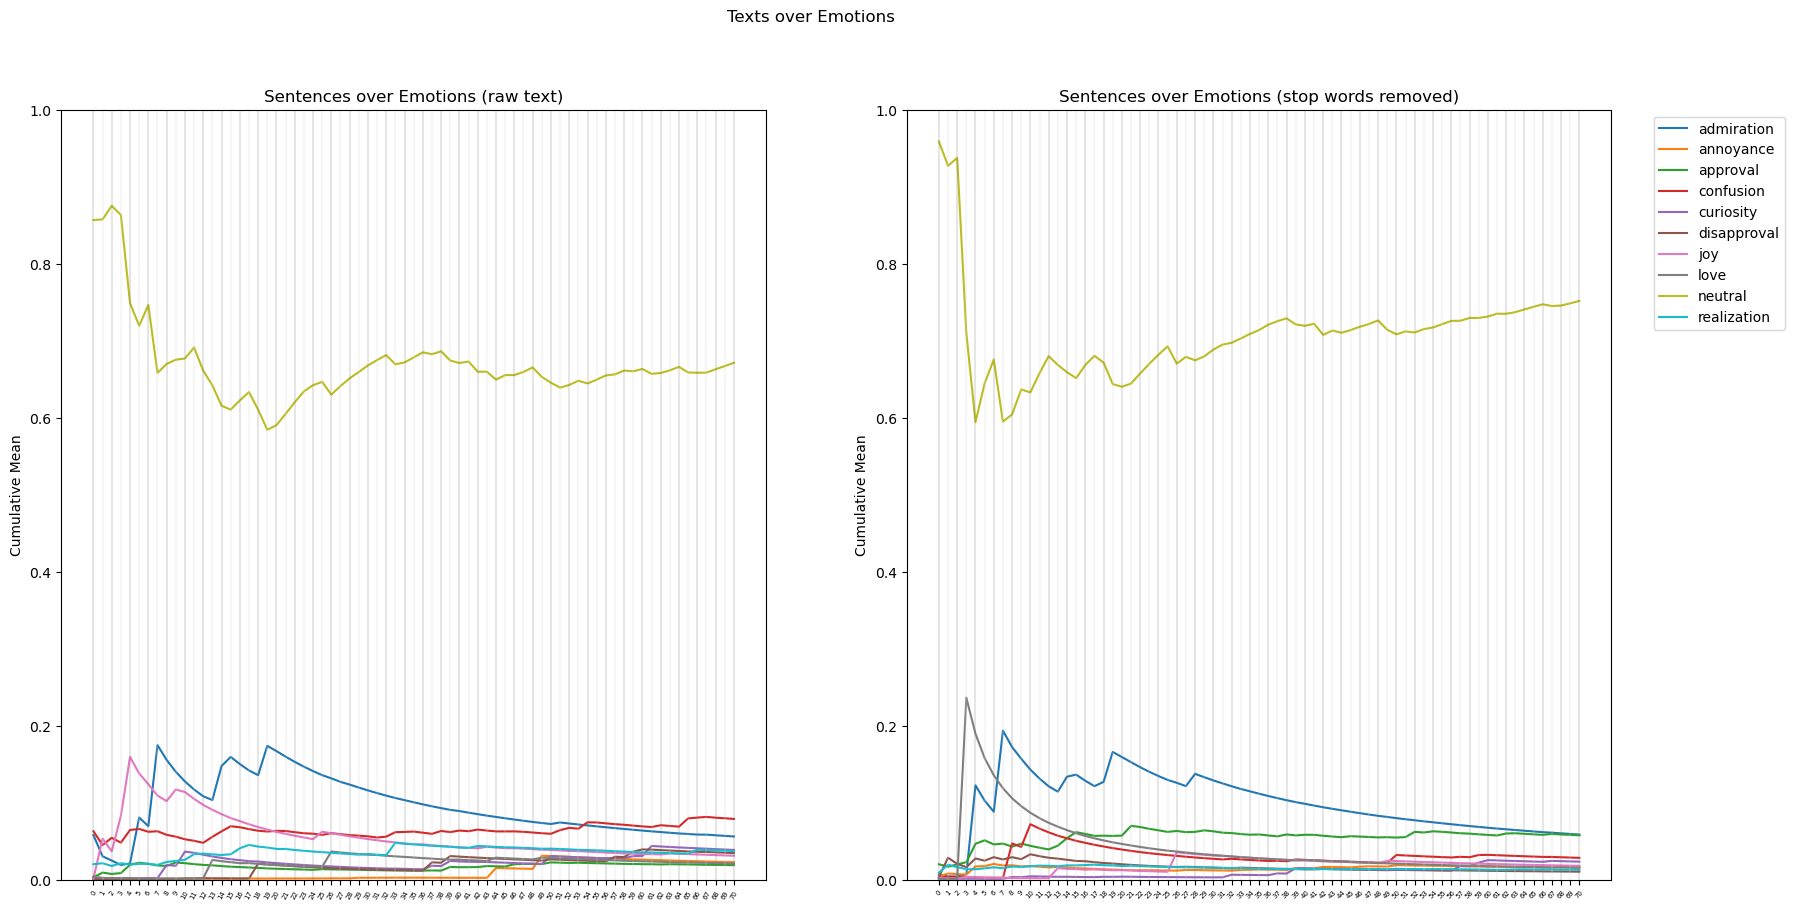

In [299]:
# plot as line graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Texts over Emotions')

# plot df_sentences_cs
ax1.plot(df_sentences_cs)
ax1.set_title('Sentences over Emotions (raw text)')
ax1.set_xticks(np.arange(len(df_sentences_cs.index)))
ax1.set_xticklabels(df_sentences_cs.index, rotation=60, fontsize=5)
for i in range(len(df_sentences_cs.index)):
    if i % 2 == 0:
        ax1.axvline(i, color='grey', alpha=0.2)
    else:
        ax1.axvline(i, color='lightgrey', alpha=0.2)
ax1.set_ylabel('Cumulative Mean')
ax1.set_ylim([0, 1])

# plot df_stop_sentences_cs
ax2.plot(df_stop_sentences_cs)
ax2.set_title('Sentences over Emotions (stop words removed)')
ax2.set_xticks(np.arange(len(df_stop_sentences_cs.index)))
ax2.set_xticklabels(df_stop_sentences_cs.index, rotation=45, fontsize=5)
for i in range(len(df_stop_sentences_cs.index)):
    if i % 2 == 0:
        ax2.axvline(i, color='grey', alpha=0.2)
    else:
        ax2.axvline(i, color='lightgrey', alpha=0.2)
ax2.set_ylabel('Cumulative Mean')
ax2.set_ylim([0, 1])

# show legend
ax2.legend(df_stop_sentences_cs.columns, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()

In [5]:
first_sen_sep = text[11:20]
first_sen = ' '.join(first_sen_sep).replace(' .', '.')
first_sen_pred = classifier(first_sen)
first_sen_sep_pred = classifier(first_sen_sep)

print('first_sen_pred: ', first_sen_pred)
print('first_sen_sep_pred: ', first_sen_sep_pred)

# print(first_sen)
# print(first_sen_sep)

# print(classifier('.'))
# print(classifier('?'))
# print(classifier('!'))
# function in nltk can remove stop words
print(classifier('Sherlock Holmes woman'))

first_sen_pred:  [[{'label': 'neutral', 'score': 0.8566603064537048}, {'label': 'approval', 'score': 0.06297065317630768}, {'label': 'admiration', 'score': 0.0579439140856266}, {'label': 'realization', 'score': 0.020114362239837646}, {'label': 'excitement', 'score': 0.005308742169290781}, {'label': 'joy', 'score': 0.003908892627805471}, {'label': 'annoyance', 'score': 0.003083163173869252}, {'label': 'love', 'score': 0.003046567551791668}, {'label': 'optimism', 'score': 0.0028164926916360855}, {'label': 'disappointment', 'score': 0.0027771310415118933}, {'label': 'amusement', 'score': 0.0027133256662636995}, {'label': 'fear', 'score': 0.002222547074779868}, {'label': 'pride', 'score': 0.002144644735381007}, {'label': 'surprise', 'score': 0.0021419525146484375}, {'label': 'disgust', 'score': 0.0019062362844124436}, {'label': 'sadness', 'score': 0.0017397095216438174}, {'label': 'disapproval', 'score': 0.001417580177076161}, {'label': 'gratitude', 'score': 0.0014008610742166638}, {'label

In [6]:
# test if aggregated prediction by taking mean over each word prediction is
# the same as the prediction for the whole sentence
aggr_pred = []
for i in range(len(first_sen_sep)):
    phrase = ' '.join(first_sen_sep[:i+1]).replace(' .', '.')
    pred = classifier(phrase)
    aggr_pred.append(pred)

aggr_pred_by_word = []
for i in range(len(first_sen_sep)):
    pred = classifier(first_sen_sep[i])
    print(pred)
    type(pred)

[[{'label': 'neutral', 'score': 0.9623603224754333}, {'label': 'approval', 'score': 0.009797901846468449}, {'label': 'annoyance', 'score': 0.009057078510522842}, {'label': 'anger', 'score': 0.004284152295440435}, {'label': 'realization', 'score': 0.0037305026780813932}, {'label': 'admiration', 'score': 0.0035849527921527624}, {'label': 'disapproval', 'score': 0.0033575212582945824}, {'label': 'disappointment', 'score': 0.0029384451918303967}, {'label': 'excitement', 'score': 0.0028350413776934147}, {'label': 'disgust', 'score': 0.0024595544673502445}, {'label': 'sadness', 'score': 0.0021830331534147263}, {'label': 'joy', 'score': 0.002176304580643773}, {'label': 'amusement', 'score': 0.0019927239045500755}, {'label': 'confusion', 'score': 0.001696501625701785}, {'label': 'fear', 'score': 0.0015908965142443776}, {'label': 'optimism', 'score': 0.0015777323860675097}, {'label': 'curiosity', 'score': 0.0014648910146206617}, {'label': 'gratitude', 'score': 0.001166412839666009}, {'label': '

In [72]:
firstSenSepPred = classifier(firstSenSep)

[[{'label': 'neutral', 'score': 0.9623603224754333},
  {'label': 'approval', 'score': 0.009797901846468449},
  {'label': 'annoyance', 'score': 0.009057078510522842},
  {'label': 'anger', 'score': 0.004284152295440435},
  {'label': 'realization', 'score': 0.0037305026780813932},
  {'label': 'admiration', 'score': 0.0035849527921527624},
  {'label': 'disapproval', 'score': 0.0033575212582945824},
  {'label': 'disappointment', 'score': 0.0029384451918303967},
  {'label': 'excitement', 'score': 0.0028350413776934147},
  {'label': 'disgust', 'score': 0.0024595544673502445},
  {'label': 'sadness', 'score': 0.0021830331534147263},
  {'label': 'joy', 'score': 0.002176304580643773},
  {'label': 'amusement', 'score': 0.0019927239045500755},
  {'label': 'confusion', 'score': 0.001696501625701785},
  {'label': 'fear', 'score': 0.0015908965142443776},
  {'label': 'optimism', 'score': 0.0015777323860675097},
  {'label': 'curiosity', 'score': 0.0014648910146206617},
  {'label': 'gratitude', 'score': 